### This notebook produce the scatter plot and kde plot, with correlation coefficient labeled 

### To do: learn how to put the subplots from JointGrid into one panel
---

##### Import libraries

In [99]:
import seaborn as sns
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
#import dataframe as df


##### Start with an example to play with scatter, kde, and overlaid figure

/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/glade/work/kwenwen/ven

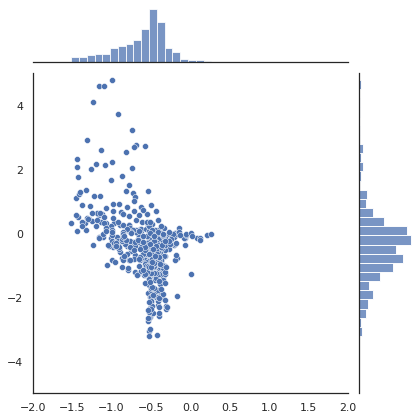

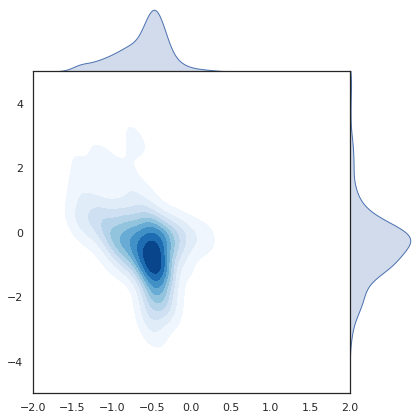

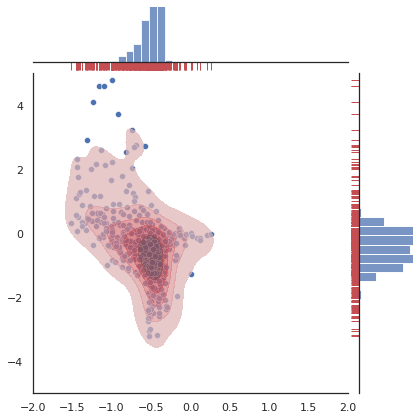

In [100]:
file = 'rs20_minus_rs1000_yr6-25_10S-10N_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc'
nc         = xr.open_dataset(file)
y          = nc.variables['t2m_var'].values[:]
x          = nc.variables['lhflx_t2m'].values[:]
y          = np.where(y > 1e35, np.nan, y) # mask out FillValue
x          = np.where(x > 1e35, np.nan, x) # mask out FillValue
x          = x[~np.isnan(x)]
y          = y[~np.isnan(y)]  

sns.set_style('white')
sns.jointplot(x, y, kind='scatter', xlim=(-2, 2), ylim=(-5, 5))
sns.jointplot(x, y, kind='kde', space=0, fill=True, cmap='Blues', xlim=(-2, 2), ylim = (-5, 5))

g = sns.jointplot(x, y, xlim=(-2, 2), ylim=(-5, 5))
g.plot_joint(sns.kdeplot, color='r', zorder=10, levels=6, fill=True, alpha = .7)
g.plot_marginals(sns.rugplot, color='r', height=-.15, clip_on=False)


#### Add x-label, y-labe, title, and calculate r and p

/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


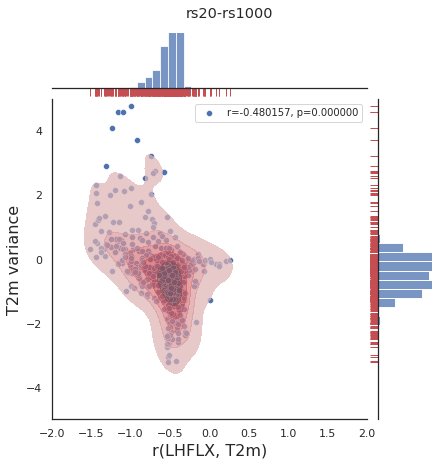

In [102]:
sns.set_style('white')

g = sns.jointplot(x, y, xlim=(-2, 2), ylim=(-5, 5))
g.plot_joint(sns.kdeplot, color='r', zorder=10, levels=6, fill=True, alpha = .7)
g.plot_marginals(sns.rugplot, color='r', height=-.15, clip_on=False)
g.set_axis_labels('r(LHFLX, T2m)', 'T2m variance', fontsize=16)
g.fig.suptitle("rs20-rs1000", y = 1.03)
r, p = stats.pearsonr(x, y)

legend_properties = {'weight':'normal','size':10}
g.ax_joint.legend(prop=legend_properties,loc='upper right', labels=['r={:f}, p={:f}'.format(r,p)])


/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/glade/work/kwenwen/venvs/my_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: Fut

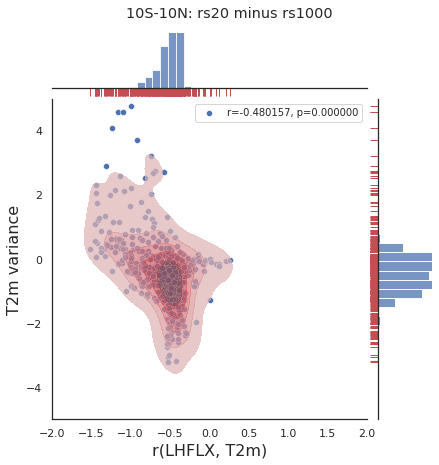

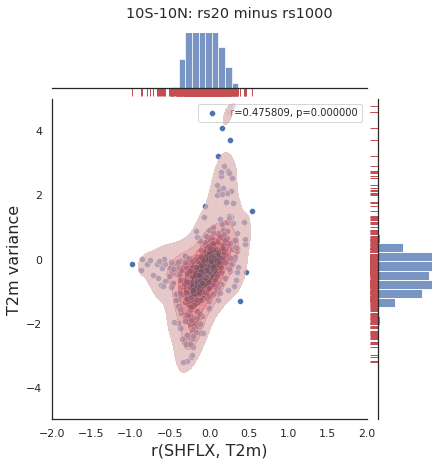

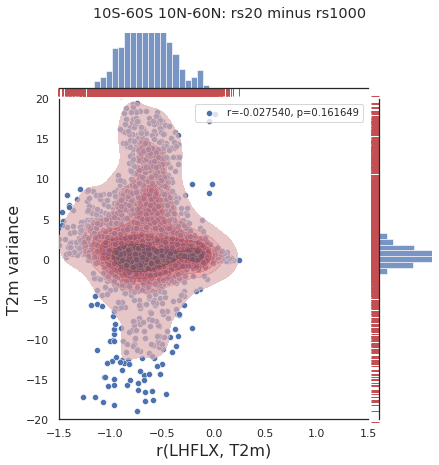

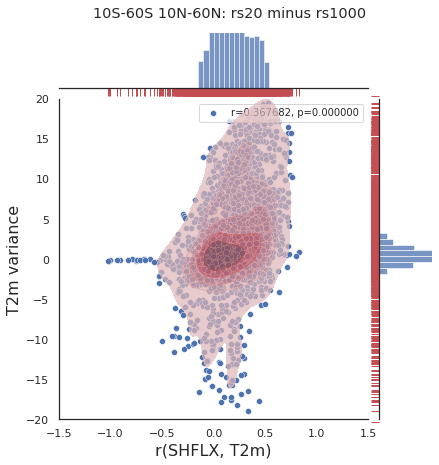

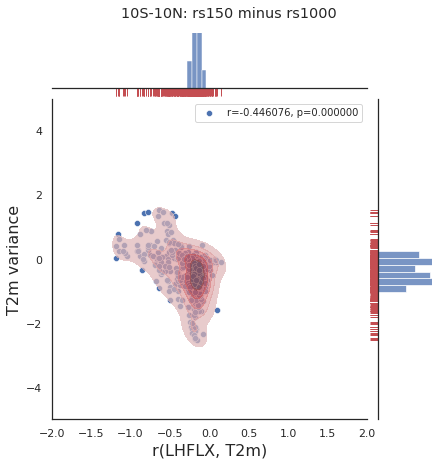

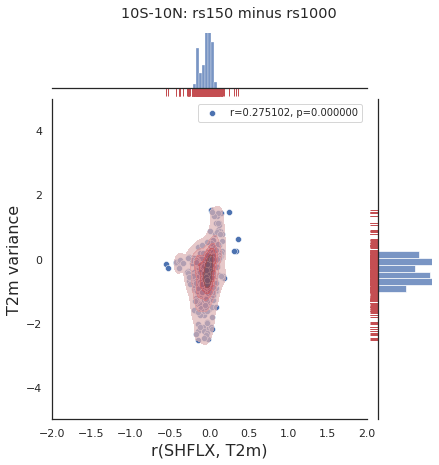

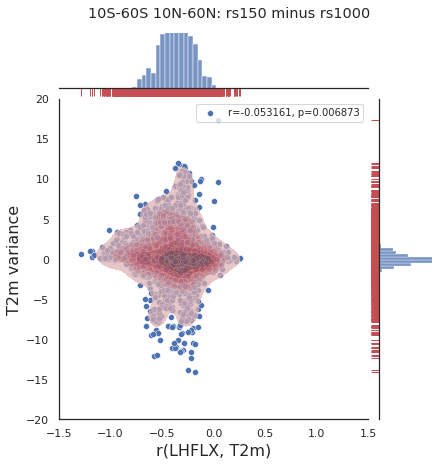

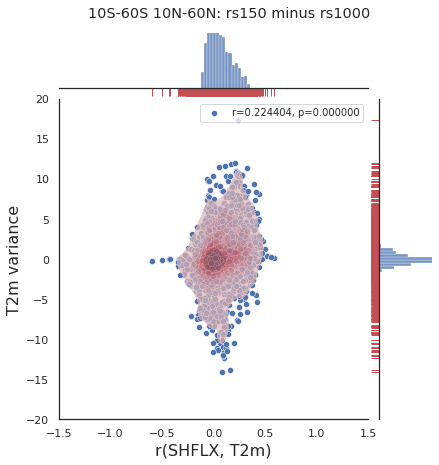

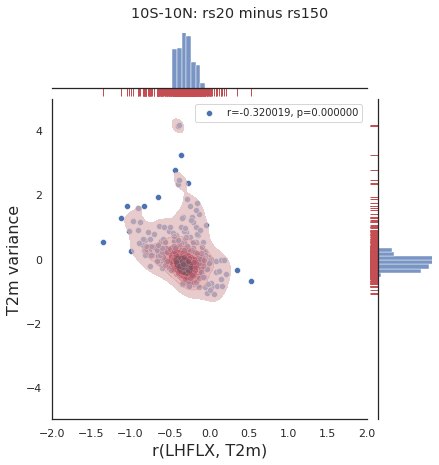

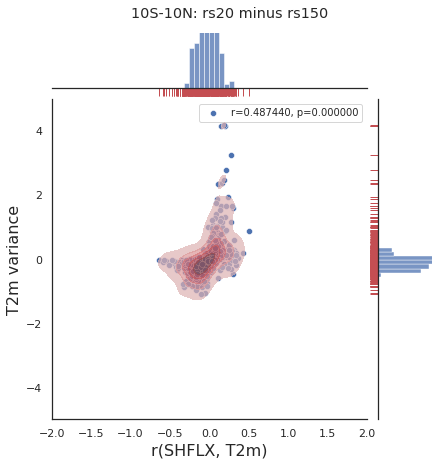

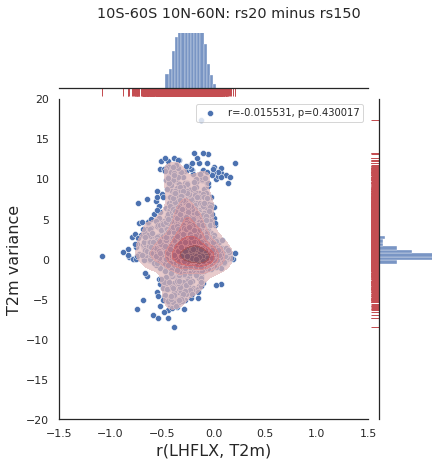

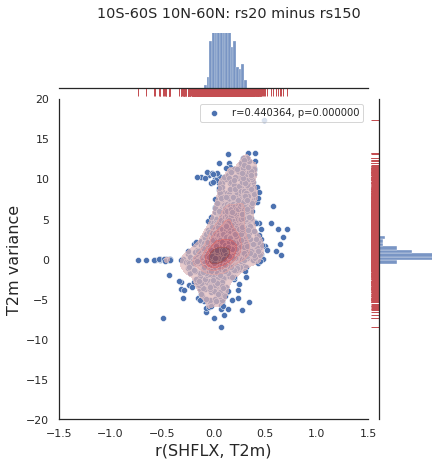

In [107]:
files_tropics = ['rs20_minus_rs1000_yr6-25_10S-10N_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc',
                 'rs150_minus_rs1000_yr6-25_10S-10N_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc',
                 'rs20_minus_rs150_yr6-25_10S-10N_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc']
title_tropics = ['10S-10N: rs20 minus rs1000',
                 '10S-10N: rs150 minus rs1000',
                 '10S-10N: rs20 minus rs150']

files_midlat = ['rs20_minus_rs1000_yr6-25_10N-60N_10S-60S_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc',
                 'rs150_minus_rs1000_yr6-25_10N-60N_10S-60S_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc',
                 'rs20_minus_rs150_yr6-25_10N-60N_10S-60S_t2m-var_cor-lhflx-t2m_cor-shflx-t2m_cor-lhflx-sm.nc']
title_midlat = ['10S-60S 10N-60N: rs20 minus rs1000',
                '10S-60S 10N-60N: rs150 minus rs1000',
                '10S-60S 10N-60N: rs20 minus rs150']

def scatter_kde(file, x_var, y_var, xlim, ylim, x_label, y_label, title):
    nc  = xr.open_dataset(file)
    x   = nc.variables[x_var].values[:]
    y   = nc.variables[y_var].values[:]
    x   = np.where(x > 1e35, np.nan, x)
    y   = np.where(y > 1e35, np.nan, y)
    x   = x[~np.isnan(x)]
    y   = y[~np.isnan(y)]

    g   = sns.jointplot(x, y, xlim=xlim, ylim=ylim)
    g.plot_joint(sns.kdeplot, color='r', zorder=10, levels=6, fill=True, alpha = .7)
    g.plot_marginals(sns.rugplot, color='r', height=-.15, clip_on=False)
    g.set_axis_labels(x_label, y_label, fontsize=16)
    g.fig.suptitle(title, y = 1.03)
    r, p = stats.pearsonr(x, y)

    legend_properties = {'weight':'normal','size':10}
    g.ax_joint.legend(prop=legend_properties,loc='upper right', labels=['r={:f}, p={:f}'.format(r,p)])
    g.savefig('scatter_kde_'+title+'_'+x_var+'_'+y_var+'.png', dpi=300)
    return g

for i in [0, 1, 2]:
    
    scatter_kde(files_tropics[i], 'lhflx_t2m', 't2m_var', (-2, 2), (-5, 5), 'r(LHFLX, T2m)', 'T2m variance', title_tropics[i])
    scatter_kde(files_tropics[i], 'shflx_t2m', 't2m_var', (-2, 2), (-5, 5), 'r(SHFLX, T2m)', 'T2m variance', title_tropics[i])
   # scatter_kde(files_tropics[i], 'lhflx_sm', 't2m_var', 'r(LHFLX, SM)', 'T2m variance', title_tropics[i])
    
    scatter_kde(files_midlat[i], 'lhflx_t2m', 't2m_var', (-1.5, 1.5), (-20, 20), 'r(LHFLX, T2m)', 'T2m variance', title_midlat[i])
    scatter_kde(files_midlat[i], 'shflx_t2m', 't2m_var', (-1.5, 1.5), (-20, 20), 'r(SHFLX, T2m)', 'T2m variance', title_midlat[i])
   # scatter_kde(files_midlat[i], 'lhflx_sm', 't2m_var', 'r(LHFLX, SM)', 'T2m variance', title_midlat[i])
    

